<a href="https://colab.research.google.com/github/SanketMahajan2004/Atm/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[44  1]
 [ 3 12]]
0.9333333333333333


<ipython-input-1-f254263a7ae9>:94: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


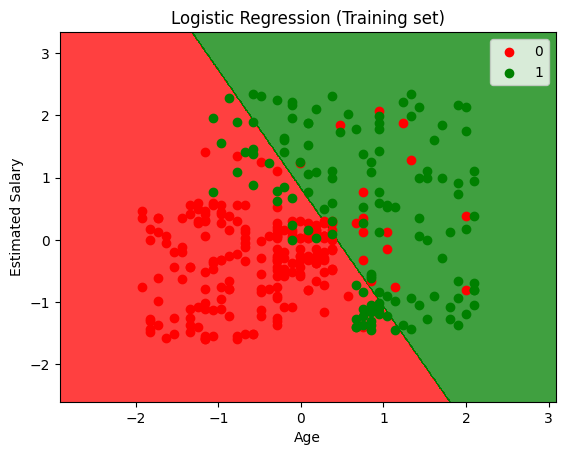

<ipython-input-1-f254263a7ae9>:137: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


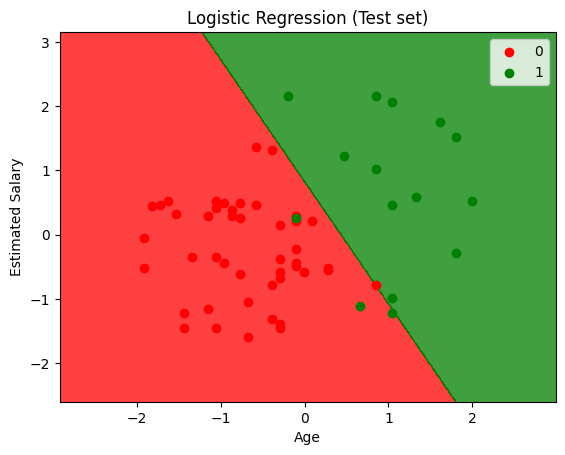

In [1]:

# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(r"/content/Social_Network_Ads.csv")
#this datasset contian information of user and socianl network, those features are - userid,gender,age,salary,purchased
#social network has several business client which can put their into social networks and one of the client is car company , this company has newly lunched XUV in rediculous price or high price
#we will see which of the user in this social network are going to buy brand new xuv car
#Last column tell us user purchased the car yes-1 // no-0 & we are going to build the model that is goint to predict if the user is going to buy xuv or not based on 2 variable based on age & estimated salery
#so our matrix of feature is only these 2 column & we gonna find some corelation b/w age and estimated salary of user and his decission to purchase the car [yes or no]
#so i need 2 index and rest of index i will remove for this i have to use slicing operator
#1 means - the user going to buy the car & 0 means - user is not going to buy the car


X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#for this observation let me selcted as 100 observaion for test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state = 0)

#we are going to predict which users are going to predit xuv

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#we mentioned feature scaling only to independent variable not dependent variable at all

#datapreprocessing done guys upto this part

#******************************************************************************************

#Next step is we are going to build the logistic model and appy this model into our dataset
#This is linear model library thats why we called from sklear.linear_model

# Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
#we have to fit the logistic regression model to our training set

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#now you compare X_test with y_pred, x-test we have age and salary ,
#if u look at the first observation this user is not be able to buy the car but if you look at observation 7 then that user is going to buy the car
#in this case logistic regression model classify the which users are going to buy the car or not

#we build our logistic model and fit it to the training set & we predict our test set result


#now we will use the confusion matrix to evalute

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#we can say that 65 + 24 = 89 correct prediction we found & 8+3 = 11 incorrect prediction made

# This is to get the Models Accuracy
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)


# This is to get the Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
cr


#********************************************************************************************************************

#Now we gonna see the visulization

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#after execute this graph we will get the good graph & lets try to understand and analyse the graph step by step
#we have points like red point & green points, all these points are our observation of the training part
#each of the user's age is estimated at the x-axis & estimated salary are estimated at y-axis
#red points are the training set observation which the dependent variable purchased equal to 0
# green points are the training set observation which the dependent variable puchased equal to 1
#red points users are didnt able to buy the suv & green points users are able to buy the xuv
#what we observed hear is users are young with low estimate salary actually didnt buy the xuv
#if you look at the users with older with high salary they will buy the xuv & xuv is family car so more older people are likely to buy this car
#now if you see some green points you can see in the red part , in this case even though older but due to less salary they are unable to buy car
#also some of the young people are also buy the car becuase of rich kid

#now what is the goal of classification & what classifer exactly do hear & how this classifier will do for this business case
#the main goal is classify the right users into right category that machine will do by logistic regression using s -curve
#the machine classify all dataset in 2 region, left region is to classify who not buy the car and the green is to classify who can buy the car
#logisti regression model ploted red pooint users are not going to buy the XUV and green point users are going to buy the xuv
#logistic regression will tells that each user in the dataset is proper classified based on age & salary
#main important thing is these are the 2 prediction (red & green) separated by straight line & the straight line is calle prediction boundry
#as we are talking logistice regression os linear model so we will requred only for 2 variable & sepated with straight line and logistic regressin is linear classifer
#we will see next classed how non-linear classifier will separte wont be straight line
#even though if you see the green point even though low salary they buy the xuv which is incorrect
#if you see the green points are belongs to the red regions this happen becuae users are non-linear but we separate with linear model thats why we got this prediction
#now we are looking visualiaton for traing set & next we going to see the visualization for test set
#


# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#lets see the graph we get good graph we have plotted for the test data point
#if you see the confustion matrix we saw 11 points are incorrectly predicted hear , you can count that
#we build our first classification model in python

Saving rice.jpg to rice.jpg


# New section